# Data selection using pyfesom2's xarray-accesor.

## 1. Introduction
A key feature of pyfesom2 is to facilitate spatial selections on its unstructured triangular grid, that is currently not supported by commonly used python libraries. Xarray provides a powerful label based selection on datasets and variables (dataarray). A similar interface is provided (with additional convinient features) for FESOM data through `pyfesom2` accessor.


Xarray's sel method takes dimension names of a dataset or datarray as arguments for selection. For rectiliner grids this provides easy interface to select arbitary points and rectangular regions (using slices) in latitudes and longitudes. In case of FESOM unstructured grid, latitudes, longitudes are not orthogonal to each other and are not part of dataset's dimensions, insted they are coordinates of a common dimension `nod2`. This means the convinent spatial selection in xarray using latitude and longitude as indexers is not possible for FESOM data using regular `sel(lat=..., lon=...)` method. The `dataset.pyfesom2.select(lat=..., lon=...)` method of `pyfesom2` provides alternative to do such selections on FESOM data. Being in a constrained data environment also allows us to more add convinient features such as selecting arbitarary polygons. 


Because of differences in functionality, arguments, and to minimize confusion with xarray's `sel` method, accessor's selection methods are prefixed with `select`.

### Load a tutorial dataset


For more examples loading datasets see [datasets](https://nbviewer.jupyter.org/github/FESOM/pyfesom2/blob/master/notebooks/remote_datasets.ipynb) example notebook. 

In [1]:
from pyfesom2.datasets import core
fesom_ds = core.load()
fesom_ds

<xarray.Dataset>
Dimensions:  (nelem: 243899, nod2: 126858, nz: 48, nz1: 47, three: 3, time: 144)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-31T23:15:00 ... 1959-12-31T23:15:00
    lat      (nod2) float64 dask.array<chunksize=(31715,), meta=np.ndarray>
    lon      (nod2) float64 dask.array<chunksize=(31715,), meta=np.ndarray>
  * nz1      (nz1) float64 -2.5 -7.5 -15.0 ... -5.525e+03 -5.825e+03 -6.125e+03
    faces    (nelem, three) uint32 dask.array<chunksize=(60975, 2), meta=np.ndarray>
  * nz       (nz) float64 0.0 -5.0 -10.0 -20.0 ... -5.65e+03 -6e+03 -6.25e+03
Dimensions without coordinates: nelem, nod2, three
Data variables:
    temp     (time, nod2, nz1) float32 dask.array<chunksize=(1, 126858, 47), meta=np.ndarray>
    salt     (time, nod2, nz1) float32 dask.array<chunksize=(1, 126858, 47), meta=np.ndarray>
    a_ice    (time, nod2) float32 dask.array<chunksize=(1, 126858), meta=np.ndarray>
    m_ice    (time, nod2) float32 dask.array<chunksize=(1, 126858), meta=np.ndarray>
    ssh      (time, nod2) float32 dask.array<chunksize=(1, 126858), meta=np.ndarray>
    sst      (time, nod2) float32 dask.array<chunksize=(1, 126858), meta=np.ndarray>
Attributes:
    Dataset URL:  https://swiftbrowser.dkrz.de/public/dkrz_02942825-0cab-44f3...

## 2. Region selection

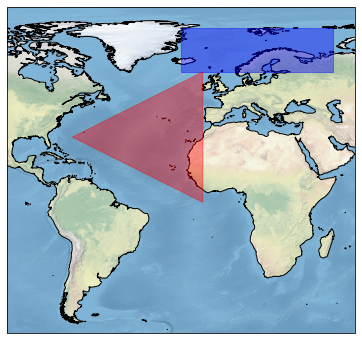 
     
To select a rectangular region, bounds of bounding rectangle defined as `(minlon, minlat, maxlon, maxlat)` can be passed to `region` argument. To select arbitary polygons, Shapely's Polygon object can be used as an argument to `region`. The region selection returns reindexed faces corresponding to selected points. This subsetted data may be saved to disk using regular xarray saving methods such as `.to_netcdf(path_to_file.nc)`.


Select a rectangular region.

In [2]:
fesom_ds.pyfesom2.select(region=(-20, 60, 50, 80))

<xarray.Dataset>
Dimensions:  (nelem: 12737, nod2: 6699, nz: 48, nz1: 47, three: 3, time: 144)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-31T23:15:00 ... 1959-12-31T23:15:00
    lat      (nod2) float64 dask.array<chunksize=(276,), meta=np.ndarray>
    lon      (nod2) float64 dask.array<chunksize=(276,), meta=np.ndarray>
  * nz1      (nz1) float64 -2.5 -7.5 -15.0 ... -5.525e+03 -5.825e+03 -6.125e+03
  * nz       (nz) float64 0.0 -5.0 -10.0 -20.0 ... -5.65e+03 -6e+03 -6.25e+03
    faces    (nelem, three) int64 3462 3464 66 59 3041 ... 2775 235 6698 2773
Dimensions without coordinates: nelem, nod2, three
Data variables:
    temp     (time, nod2, nz1) float32 dask.array<chunksize=(1, 6699, 47), meta=np.ndarray>
    salt     (time, nod2, nz1) float32 dask.array<chunksize=(1, 6699, 47), meta=np.ndarray>
    a_ice    (time, nod2) float32 dask.array<chunksize=(1, 6699), meta=np.ndarray>
    m_ice    (time, nod2) float32 dask.array<chunksize=(1, 6699), meta=np.ndarray>
    ssh      (time, nod2) float32 dask.array<chunksize=(1, 6699), meta=np.ndarray>
    sst      (time, nod2) float32 dask.array<chunksize=(1, 6699), meta=np.ndarray>
Attributes:
    Dataset URL:  https://swiftbrowser.dkrz.de/public/dkrz_02942825-0cab-44f3...

Select a triangular region defined by Shapely's Polygon

In [3]:
from shapely.geometry import Polygon
polygon_region = Polygon([(-70, 30), (-10, 0), (-10, 60)])  # a triangle in atlantic
fesom_ds.pyfesom2.select(region=polygon_region)

<xarray.Dataset>
Dimensions:  (nelem: 7387, nod2: 3887, nz: 48, nz1: 47, three: 3, time: 144)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-31T23:15:00 ... 1959-12-31T23:15:00
    lat      (nod2) float64 dask.array<chunksize=(711,), meta=np.ndarray>
    lon      (nod2) float64 dask.array<chunksize=(711,), meta=np.ndarray>
  * nz1      (nz1) float64 -2.5 -7.5 -15.0 ... -5.525e+03 -5.825e+03 -6.125e+03
  * nz       (nz) float64 0.0 -5.0 -10.0 -20.0 ... -5.65e+03 -6e+03 -6.25e+03
    faces    (nelem, three) int64 2088 2089 2090 3065 154 ... 3886 3013 617 3886
Dimensions without coordinates: nelem, nod2, three
Data variables:
    temp     (time, nod2, nz1) float32 dask.array<chunksize=(1, 3887, 47), meta=np.ndarray>
    salt     (time, nod2, nz1) float32 dask.array<chunksize=(1, 3887, 47), meta=np.ndarray>
    a_ice    (time, nod2) float32 dask.array<chunksize=(1, 3887), meta=np.ndarray>
    m_ice    (time, nod2) float32 dask.array<chunksize=(1, 3887), meta=np.ndarray>
    ssh      (time, nod2) float32 dask.array<chunksize=(1, 3887), meta=np.ndarray>
    sst      (time, nod2) float32 dask.array<chunksize=(1, 3887), meta=np.ndarray>
Attributes:
    Dataset URL:  https://swiftbrowser.dkrz.de/public/dkrz_02942825-0cab-44f3...

Other orthogonal dimensions to lat,lon such as time, nz1, may also be used similar to xarray's `sel` method. Note that `select` method allows mixing of arrays for lat, lon as indexer and slices for other dimensions unlike Xarray for convinience.

In [4]:
fesom_ds.pyfesom2.select(region=polygon_region, time=slice('1950-01-01', '1950-05-02'))

<xarray.Dataset>
Dimensions:  (nelem: 7387, nod2: 3887, nz: 48, nz1: 47, three: 3, time: 4)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-31T23:15:00 ... 1950-04-30T23:15:00
    lat      (nod2) float64 dask.array<chunksize=(711,), meta=np.ndarray>
    lon      (nod2) float64 dask.array<chunksize=(711,), meta=np.ndarray>
  * nz1      (nz1) float64 -2.5 -7.5 -15.0 ... -5.525e+03 -5.825e+03 -6.125e+03
  * nz       (nz) float64 0.0 -5.0 -10.0 -20.0 ... -5.65e+03 -6e+03 -6.25e+03
    faces    (nelem, three) int64 2088 2089 2090 3065 154 ... 3886 3013 617 3886
Dimensions without coordinates: nelem, nod2, three
Data variables:
    temp     (time, nod2, nz1) float32 dask.array<chunksize=(1, 3887, 47), meta=np.ndarray>
    salt     (time, nod2, nz1) float32 dask.array<chunksize=(1, 3887, 47), meta=np.ndarray>
    a_ice    (time, nod2) float32 dask.array<chunksize=(1, 3887), meta=np.ndarray>
    m_ice    (time, nod2) float32 dask.array<chunksize=(1, 3887), meta=np.ndarray>
    ssh      (time, nod2) float32 dask.array<chunksize=(1, 3887), meta=np.ndarray>
    sst      (time, nod2) float32 dask.array<chunksize=(1, 3887), meta=np.ndarray>
Attributes:
    Dataset URL:  https://swiftbrowser.dkrz.de/public/dkrz_02942825-0cab-44f3...

## 2. Point selection

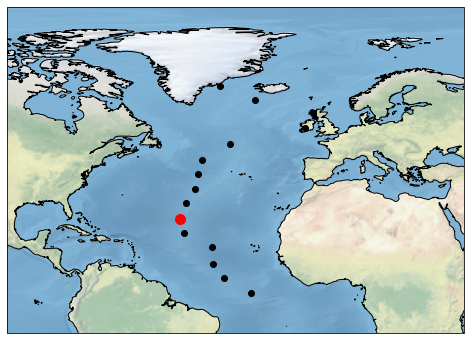 



To select a data closest to a single point in latitude and longitude, `select` method can be supplied with lat, lon values as indexers such as: 

> `fesom_ds.select(lon=-20, lat=10)`


To select more points, that may define a transect in latitude and longitude, they can be provided as lat and lon arguments (and have to be of same size) containing sequence of values.

<div class="alert alert-block alert-info"> Note that point selection defaults to nearest neighbor selection on geocentric projection. This is equivalent to using tunnel distance for evaluating nearest neighbor.</div>



Define points in latitude and longitude as  numpy arrays and select closest data.

In [ ]:
import numpy as np
sel_lats = np.linspace(-90,90,10) 
sel_lons = np.linspace(-180,180,10)
fesom_ds.pyfesom2.select(lat= sel_lats, lon= sel_lons)


<div class="alert alert-block alert-info">Note that point selection does not return faces in coordinates, because faces contains indices and after selection they have no relavence, in future we may return lat and lon bnds </div>

Additionally other dimensions can also be passed as indexers similar to Xarray's sel method, in that case an orthogonal selection, ie., transect at selected times and levels is made.

In [ ]:
fesom_ds.pyfesom2.select(lat= sel_lats, lon= sel_lons, nz1=slice(0, -1000)) 

Note that mixing arrays and slices is allowed in `select` method. For convinience, select method also takes path argument that can be a shapely's LineString achieving same selection as above but also returns distance along path as an additional coordinate.

### 2.1 Trajectory selection
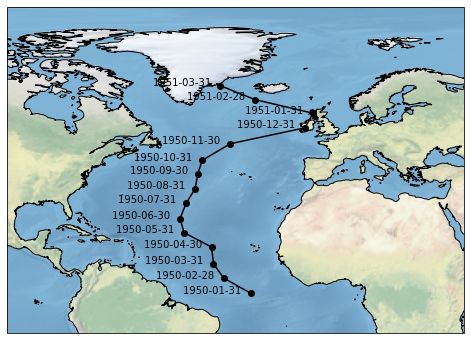 


To select points along a transect defined in more then just lat-lon (trajectory). it is often convinient to use `select_points` method. Arrays defining a trajectory can directly be passed as arguments to `select_points` to make a trajectory like selection. However `select` method may also be used by using  
advanced indexing of Xarray. Apart from this simplification, `select_points` also returns additional diagnostics related to point selection such as distance along the trajectory, that can be useful for plotting. In future we intend to add more diagnostics around selection like error estimates from selection.

In [ ]:
import pandas as pd
# Define selection values in time, depth, lat, lon
sel_times = pd.date_range('1950-01-01', freq='M', periods=5)
sel_levels = [0, -10, -5, -30, -15]
sel_lats = np.linspace(-90,90,5) 
sel_lons = np.linspace(-180,180,5)

In [ ]:
fesom_ds.pyfesom2.select_points(lon=sel_lons, lat=sel_lats, nz1=sel_levels, time=sel_times)

Note in such trajectory selection, all the dimensions used as indexers need to be of same size. The return dataset has these selected indexers on a common dimentions `nod2`. See accessor_plotting.ipynb example for opinionated ploting such transect.

## 3. Advanced selections

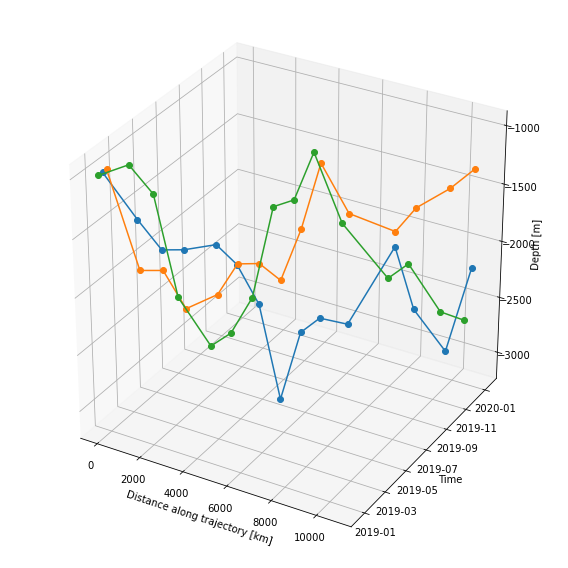
 Both `select` and `select_points` methods support Xarray's advanced indexing, this can be leveraged to select multiple trajectories at once. To use Xarray's advanced indexing, indexers have to be defined as dataarrays with a common dimentions.

Define three sample trajectories in lat, lon, time and depth. 

In [ ]:
import xarray as xr
lons_ref = np.array([-25., -33., -36., -37., -45])
lons = xr.DataArray([lons_ref, lons_ref-5., lons_ref+5.], dims=('ntraj', 'trajectory'))

lats_ref = [ 2.,  7., 11. , 16., 20.]
lats = xr.DataArray([lats_ref, lats_ref, lats_ref], dims=('ntraj', 'trajectory'))

levs = np.array([[-800., -700., -750., -900., -950.],
                 [-800., -500., -400., -600., -700.],
                 [-800., -900., -750., -600., -700.]])
levs = xr.DataArray(levs, dims=('ntraj', 'trajectory'))

times_ref = pd.date_range('1950-01-01', freq='M', periods=5)
times = xr.DataArray([times_ref, times_ref, times_ref], dims=('ntraj', 'trajectory'))

Select the trajectories at once. Dimension `ntraj` can be used to identify the trajectory.

In [ ]:
fesom_ds.pyfesom2.select_points(lon=lons, lat=lats, time =times, nz1=levs) 

## 4. Selection on variables

In above examples selections were performed on entire dataset, which is convininent to make selections on entire dataset but the `.pyfesom2` accessor can also be used on individual data variables (dataarrays) of datasets. 

In [ ]:
fesom_ds.pyfesom2.fesom_var.select_points(lon=sel_lons, lat=sel_lats, nz1=sel_levels).compute()


Here select_points is used on variable `temp` to select a transect defined using `sel_lons`, `sel_lats` and `sel_levs`.

<div class="alert alert-block alert-info" style="font-size:120%"> 
Region selection on a data variable returns a Xarray dataset. This is unlike selection on data variables in Xarray, which always returns a dataarray. Returning dataset for region selection was necessary to retain `faces` coordinate variable which otherwise would not be not possible to retain in a dataarray. The coordinate variable, faces is necessary for spatial plots and to be able to save the region subset as a standalone dataset. 
</div>    